titoli selezionati facenti parte di:
- settore tecnologico:  1) NVIDIA data l'esplosione dell'intelligenza artificiale
                        2) INTEL attualmente scontato ottima opportunità
- settore della sanità: 1) Johnosn e Johnson
                        2) PFIZER
- settore finanziario:  1) JPMorgan Chase (JPM)
                        2) Goldman Sachs (GS)

In [21]:
import pandas as pd
import numpy as np
import yfinance as yf # per il download dei dati storici dei titoli
import matplotlib.pyplot as plt # per il plot dei grafici
import datetime as dt # per la gestione delle date

In [27]:
#iniziamo a scaricare i dati storici dei titoli
start_date = dt.datetime(2014,5,31)
end_date = dt.datetime(2024,5,31)

tickers = ["NVDA", "INTC", "PFE", "JNJ", "JPM", "BAC"]
# scarichiamo i dati di tutti i titoli

data_df = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]
print(data_df.head()) #prime righe dataframe
#riordiniamo le colonne 
data_df = data_df[tickers]
print(data_df.head())

[*********************100%%**********************]  6 of 6 completed

Ticker            BAC       INTC        JNJ        JPM      NVDA        PFE
Date                                                                       
2014-06-02  12.532160  20.772064  77.708115  41.902775  4.507796  19.234697
2014-06-03  12.491096  21.076859  77.928680  42.092037  4.488756  19.157007
2014-06-04  12.491096  21.031149  78.096001  42.152611  4.493514  19.189384
2014-06-05  12.671771  21.076859  78.506714  42.871799  4.512554  19.267067
2014-06-06  12.803170  21.465479  78.476288  43.129204  4.529215  19.046949
Ticker          NVDA       INTC        PFE        JNJ        JPM        BAC
Date                                                                       
2014-06-02  4.507796  20.772064  19.234697  77.708115  41.902775  12.532160
2014-06-03  4.488756  21.076859  19.157007  77.928680  42.092037  12.491096
2014-06-04  4.493514  21.031149  19.189384  78.096001  42.152611  12.491096
2014-06-05  4.512554  21.076859  19.267067  78.506714  42.871799  12.671771
2014-06-06  

In [23]:
#piccola pulizia dei dati
data_df = data_df.dropna()

<Axes: xlabel='Date'>

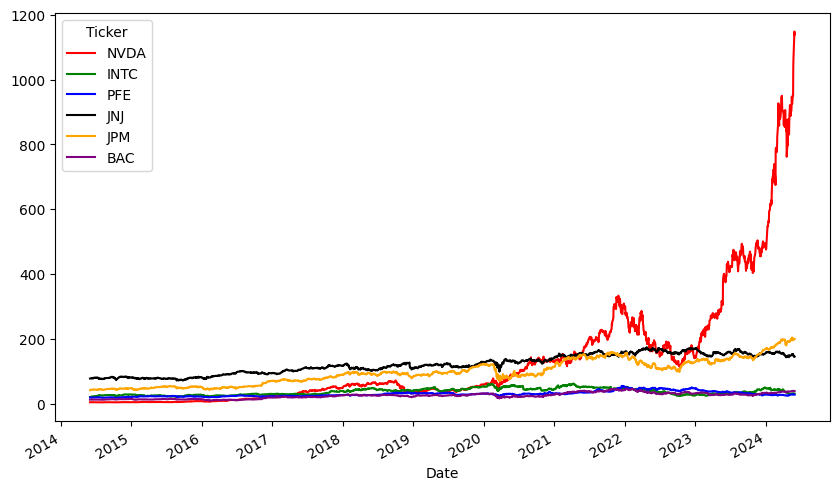

In [29]:
#grafico dei dati
#costruiamo una lista di colori per i titoli in modo che siano sempre uguali
colors = ["red", "green", "blue", "black", "orange", "purple"]
data_df.plot(figsize=(10,6), color=colors)

<Axes: xlabel='Date'>

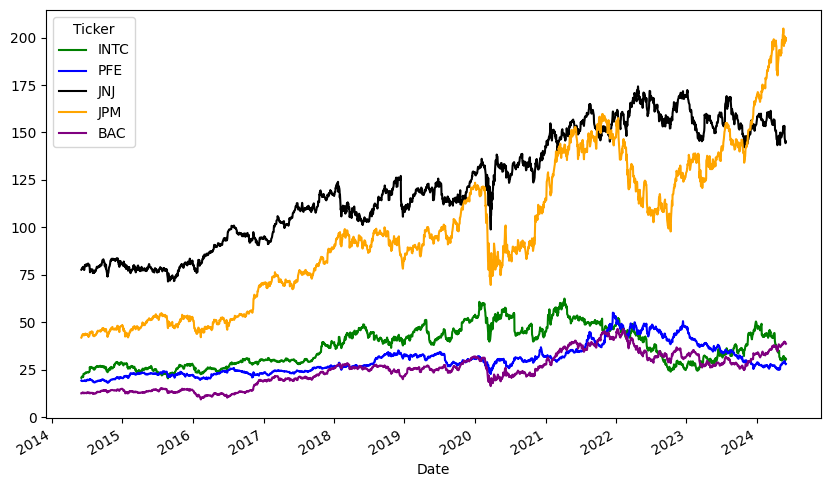

In [28]:
#plottiamo tutti i titoli tranne NVDA
data_df.drop("NVDA", axis=1).plot(figsize=(10,6), color=colors[1:])